In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [379]:
import warnings
warnings.filterwarnings("ignore")

In [381]:
df = pd.read_csv("C:\\Users\\PRIYANKA P\\Downloads\\CarPrice_Assignment.csv")

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [15]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [17]:
print(df.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [19]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [23]:
null_counts = df.isnull().sum()
print(null_counts)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [9]:
df = df.drop("car_ID", axis=1)
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
df.tail()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [112]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [118]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column)

CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem


In [168]:
df_col = df.select_dtypes(include=["object"])
for column in df_col.columns:
    unique_count = df_col[column].nunique()
    print(f"{column} : {df[column].nunique()}")

CarName : 147
fueltype : 2
aspiration : 2
doornumber : 2
carbody : 5
drivewheel : 3
enginelocation : 2
enginetype : 7
cylindernumber : 7
fuelsystem : 8


In [170]:
label_encoder = LabelEncoder()
df["CarName"] = label_encoder.fit_transform(df["CarName"])
df["fueltype"] = label_encoder.fit_transform(df["fueltype"])
df["aspiration"] = label_encoder.fit_transform(df["aspiration"])
df["doornumber"] = label_encoder.fit_transform(df["doornumber"])
df["carbody"] = label_encoder.fit_transform(df["carbody"])
df["drivewheel"] = label_encoder.fit_transform(df["drivewheel"])
df["enginelocation"] = label_encoder.fit_transform(df["enginelocation"])
df["enginetype"] = label_encoder.fit_transform(df["enginetype"])
df["cylindernumber"] = label_encoder.fit_transform(df["cylindernumber"])
df["fuelsystem"] = label_encoder.fit_transform(df["fuelsystem"])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [172]:
df.describe().round(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.0,205.00,205.00,205.00,205.00,205.00,205.00,...,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,77.21,0.9,0.18,0.44,2.61,1.33,0.01,98.76,...,126.91,3.25,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,41.01,0.3,0.39,0.50,0.86,0.56,0.12,6.02,...,41.64,2.01,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,86.60,...,61.00,0.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,44.00,1.0,0.00,0.00,2.00,1.00,0.00,94.50,...,97.00,1.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,80.00,1.0,0.00,0.00,3.00,1.00,0.00,97.00,...,120.00,5.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,115.00,1.0,0.00,1.00,3.00,2.00,0.00,102.40,...,141.00,5.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,146.00,1.0,1.00,1.00,4.00,2.00,1.00,120.90,...,326.00,7.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [174]:
df.head()
df.dtypes
object_columns = df.select_dtypes(include="object").columns
print(object_columns)

if len(object_columns) > 0:
    df.describe(include="object")

else:
    print("No object columns found in the dataset.")


Index([], dtype='object')
No object columns found in the dataset.


In [176]:
df_no = df.select_dtypes(include=[np.number])
Q1 = df_no.quantile(0.25)
Q3 = df_no.quantile(0.75)
IQR = Q3 - Q1
df= df[~((df_no < (Q1 - 1.5 *IQR)) | (df_no > (Q3 + 1.5 * IQR))).any(axis=1)]

In [178]:
print(df.columns)
df.columns = df.columns.str.strip()
X = df.drop("price", axis=1) 
y = df["price"]
df = pd.get_dummies(df, drop_first=True, columns=[col for col in df.columns if col != "price"])

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [181]:
CarPrice = df["price"]. value_counts()
CarPrice.reset_index()

,price,count
0,8495.0,2
1,8916.5,2
2,7295.0,2
3,8921.0,2
4,7609.0,2
...,...,...
84,18280.0,1
85,11245.0,1
86,10245.0,1
87,10595.0,1


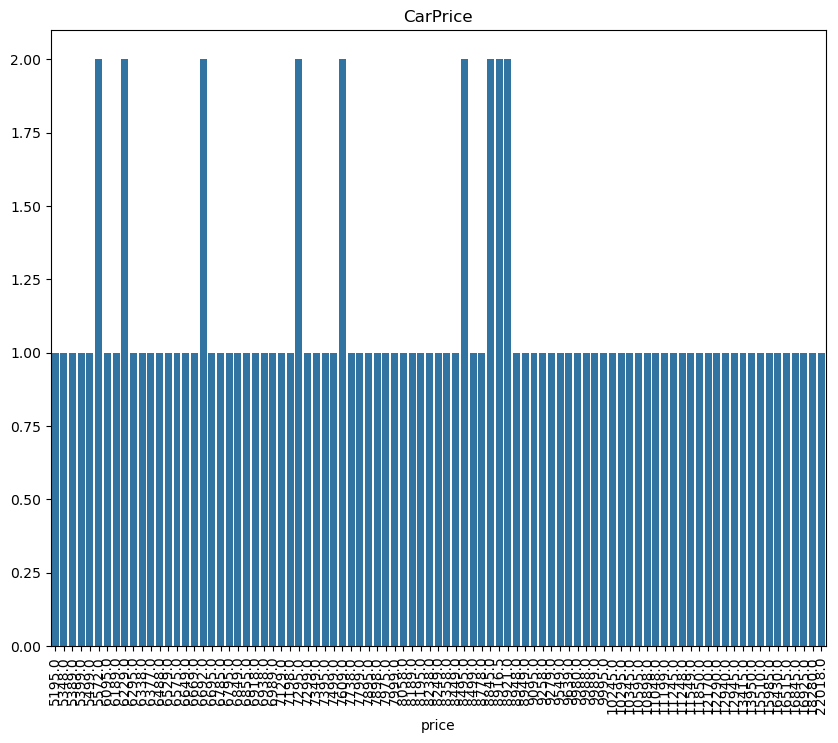

In [183]:
plt.figure(figsize = (10,8))
sns.barplot(x=CarPrice.index, y=CarPrice.values)
plt.title("CarPrice")
plt.xticks(rotation=90)
plt.show()

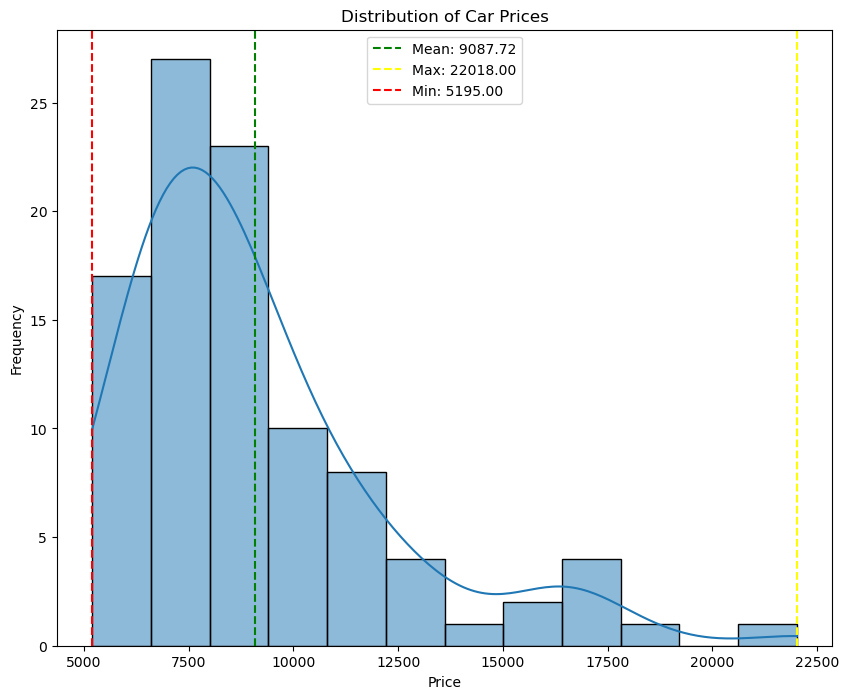

In [187]:
mean_price =df["price"].mean()
max_price = df["price"].max()
min_price = df["price"].min()

plt.figure(figsize=(10, 8))
sns.histplot(df["price"], kde=True)
plt.axvline(mean_price, color="green", linestyle="--", label=f'Mean: {mean_price:.2f}')
plt.axvline(max_price, color="yellow", linestyle="--", label=f'Max: {max_price:.2f}')
plt.axvline(min_price, color="red", linestyle="--", label=f'Min: {min_price:.2f}')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [331]:
label_encoder = LabelEncoder()
df["CarName"] = label_encoder.fit_transform(df["CarName"])
df["fueltype"] = label_encoder.fit_transform(df["fueltype"])
df["aspiration"] = label_encoder.fit_transform(df["aspiration"])
df["doornumber"] = label_encoder.fit_transform(df["doornumber"])
df["carbody"] = label_encoder.fit_transform(df["carbody"])
df["drivewheel"] = label_encoder.fit_transform(df["drivewheel"])
df["enginelocation"] = label_encoder.fit_transform(df["enginelocation"])
df["enginetype"] = label_encoder.fit_transform(df["enginetype"])
df["cylindernumber"] = label_encoder.fit_transform(df["cylindernumber"])
df["fuelsystem"] = label_encoder.fit_transform(df["fuelsystem"])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [329]:
strong_correlation_cols = [col for col in corr_matrix.columns if abs(corr_matrix.loc["price", col]) >= 0.09 and col != "pric"]

# Select features (X) and target (y)
X = df[strong_correlation_cols]
y = df["price"]

strong_correlation_cols

['car_ID',
 'CarName',
 'fueltype',
 'aspiration',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'price']

In [229]:
x = df.drop(columns = "price")
y = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(164, 25) (164,) (41, 25) (41,)


In [245]:
imputer = SimpleImputer(strategy = "mean")
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

lin_reg =  LinearRegression()
lin_reg.fit(x_train_imputed, y_train)

LinearRegression()

In [249]:
dec_tree_reg =  DecisionTreeRegressor()
dec_tree_reg.fit(x_train_imputed, y_train)

DecisionTreeRegressor()

In [261]:
ran_for_reg = RandomForestRegressor()
ran_for_reg.fit(x_train_imputed, y_train)

RandomForestRegressor()

In [263]:
gra_bost_reg = GradientBoostingRegressor()
gra_bost_reg.fit(x_train_imputed, y_train)

GradientBoostingRegressor()

In [265]:
svr = SVR()
svr.fit(x_train_imputed, y_train)

SVR()

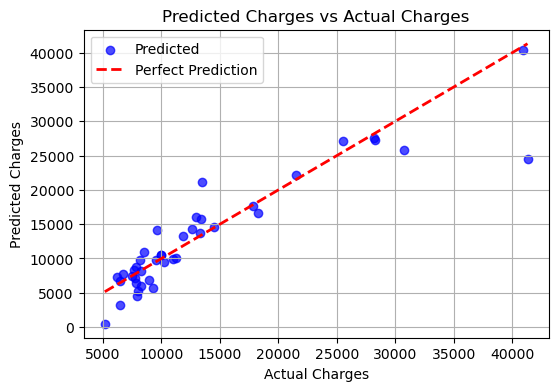

In [297]:
lin_reg_y_pred = lin_reg.predict(x_test_imputed)

plt.figure(figsize=(6, 4))
plt.scatter(y_test,lin_reg_y_pred, color='blue', alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Predicted Charges vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

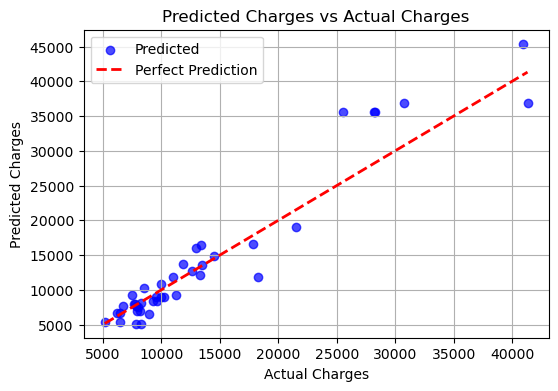

In [299]:
dec_tree_reg_y_pred = dec_tree_reg.predict(x_test_imputed)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, dec_tree_reg_y_pred, color='blue', alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Predicted Charges vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

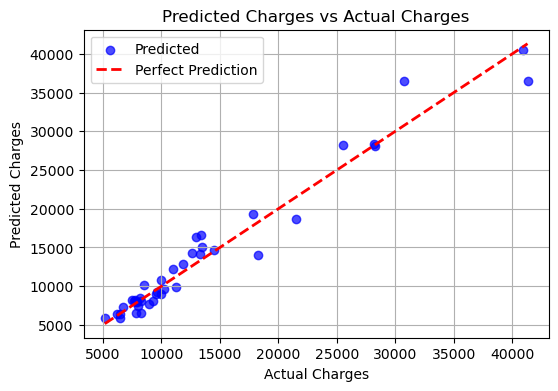

In [301]:
ran_for_reg_y_pred = ran_for_reg.predict(x_test_imputed)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, ran_for_reg_y_pred, color='blue', alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Predicted Charges vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

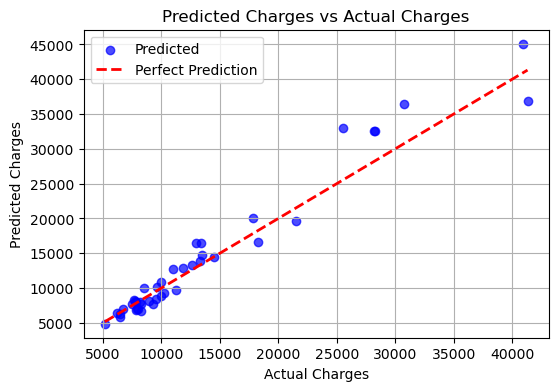

In [303]:
gra_bost_reg_y_pred = gra_bost_reg.predict(x_test_imputed)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, gra_bost_reg_y_pred, color='blue', alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Predicted Charges vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

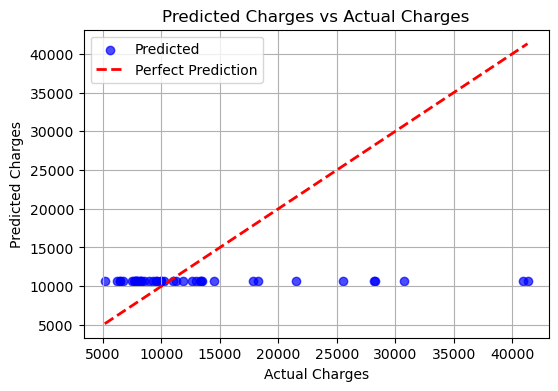

In [307]:
svr_y_pred = svr.predict(x_test_imputed)


plt.figure(figsize=(6, 4))
plt.scatter(y_test, svr_y_pred, color='blue', alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Predicted Charges vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

In [285]:
lin_reg_mse = mean_squared_error(y_test, lin_reg_y_pred)
lin_reg_mae = mean_absolute_error(y_test, lin_reg_y_pred)
lin_reg_r2 = r2_score(y_test, lin_reg_y_pred)

print("Linear Regression MSE:", lin_reg_mse)
print("Linear Regression MAE:", lin_reg_mae)
print("Linear Regression R²:", lin_reg_r2)

Linear Regression MSE: 12306121.302934464
Linear Regression MAE: 2087.306212322781
Linear Regression R²: 0.8441158536668163


In [287]:
dec_tree_reg_mse= mean_squared_error(y_test, dec_tree_reg_y_pred)
dec_tree_reg_mae= mean_absolute_error(y_test, dec_tree_reg_y_pred)
dec_tree_reg_r2 = r2_score(y_test, dec_tree_reg_y_pred)

print("Decision Tree MSE:", dec_tree_reg_mse)
print("Decision Tree MAE:", dec_tree_reg_mae)
print("Decision Tree R²:", dec_tree_reg_r2)


Decision Tree MSE: 9792535.01980217
Decision Tree MAE: 2101.7235853658535
Decision Tree R²: 0.8759559633435707


In [289]:
ran_for_reg_mse = mean_squared_error(y_test, ran_for_reg_y_pred)
ran_for_reg_mae = mean_absolute_error(y_test, ran_for_reg_y_pred)
ran_for_reg_r2 = r2_score(y_test, ran_for_reg_y_pred)

print("Random Forest MSE:", ran_for_reg_mse)
print("Random Forest MAE:", ran_for_reg_mae)
print("Random Forest R²:", ran_for_reg_r2)

Random Forest MSE: 3393667.8770896094
Random Forest MAE: 1279.5031219512193
Random Forest R²: 0.957011717426163


In [291]:
gra_bost_reg_mse = mean_squared_error(y_test, gra_bost_reg_y_pred)
gra_bost_reg_mae = mean_absolute_error(y_test, gra_bost_reg_y_pred)
gra_bost_reg_r2 = r2_score(y_test, gra_bost_reg_y_pred)

print("Gradient Boosting MSE:", gra_bost_reg_mse)
print("Gradient Boosting MAE:", gra_bost_reg_mae)
print("Gradient Boosting R²:", gra_bost_reg_r2)

Gradient Boosting MSE: 5408081.735881936
Gradient Boosting MAE: 1615.3848242834363
Gradient Boosting R²: 0.9314947265718069


In [293]:
svr_mse =mean_squared_error(y_test, svr_y_pred)
svr_mae = mean_absolute_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

print("SVR MSE:", svr_mse)
print("SVR MAE:", svr_mae)
print("SVR R²:", svr_r2)

SVR MSE: 86992793.51549557
SVR MAE: 5707.040766124767
SVR R²: -0.10195544318812244


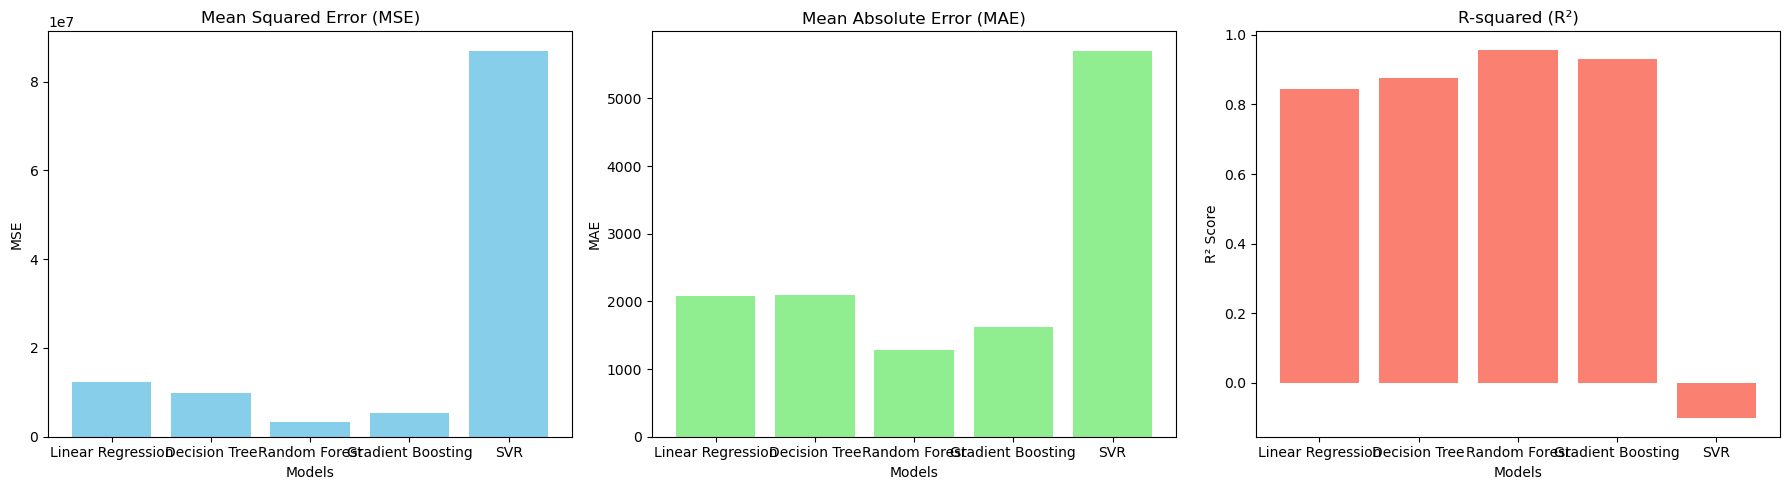

In [311]:
models = ["Linear Regression", "Decision Tree", "Random Forest","Gradient Boosting", "SVR"]

mse_values = [lin_reg_mse, dec_tree_reg_mse, ran_for_reg_mse, gra_bost_reg_mse, svr_mse]
mae_values = [lin_reg_mae, dec_tree_reg_mae, ran_for_reg_mae, gra_bost_reg_mae, svr_mae]
r2_values = [lin_reg_r2, dec_tree_reg_r2, ran_for_reg_r2, gra_bost_reg_r2, svr_r2]

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].bar(models, mse_values, color='skyblue')
ax[0].set_title('Mean Squared Error (MSE)')
ax[0].set_ylabel('MSE')

ax[1].bar(models, mae_values, color='lightgreen')
ax[1].set_title('Mean Absolute Error (MAE)')
ax[1].set_ylabel('MAE')

ax[2].bar(models, r2_values, color='salmon')
ax[2].set_title('R-squared (R²)')
ax[2].set_ylabel('R² Score')

for axis in ax:
    axis.set_xlabel('Models')
    axis.set_xticks(np.arange(len(models)))
    axis.set_xticklabels(models)

plt.tight_layout()
plt.show()


In [371]:
label_encoder = LabelEncoder()
df["CarName"] = label_encoder.fit_transform(df["CarName"])
df["fueltype"] = label_encoder.fit_transform(df["fueltype"])
df["aspiration"] = label_encoder.fit_transform(df["aspiration"])
df["doornumber"] = label_encoder.fit_transform(df["doornumber"])
df["carbody"] = label_encoder.fit_transform(df["carbody"])
df["drivewheel"] = label_encoder.fit_transform(df["drivewheel"])
df["enginelocation"] = label_encoder.fit_transform(df["enginelocation"])
df["enginetype"] = label_encoder.fit_transform(df["enginetype"])
df["cylindernumber"] = label_encoder.fit_transform(df["cylindernumber"])
df["fuelsystem"] = label_encoder.fit_transform(df["fuelsystem"])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [373]:
Lab_En =  LabelEncoder()

for column in df.columns:
    if df[column].dtype == "object":
        car[column] = lab_En.fit_transform(df[column])

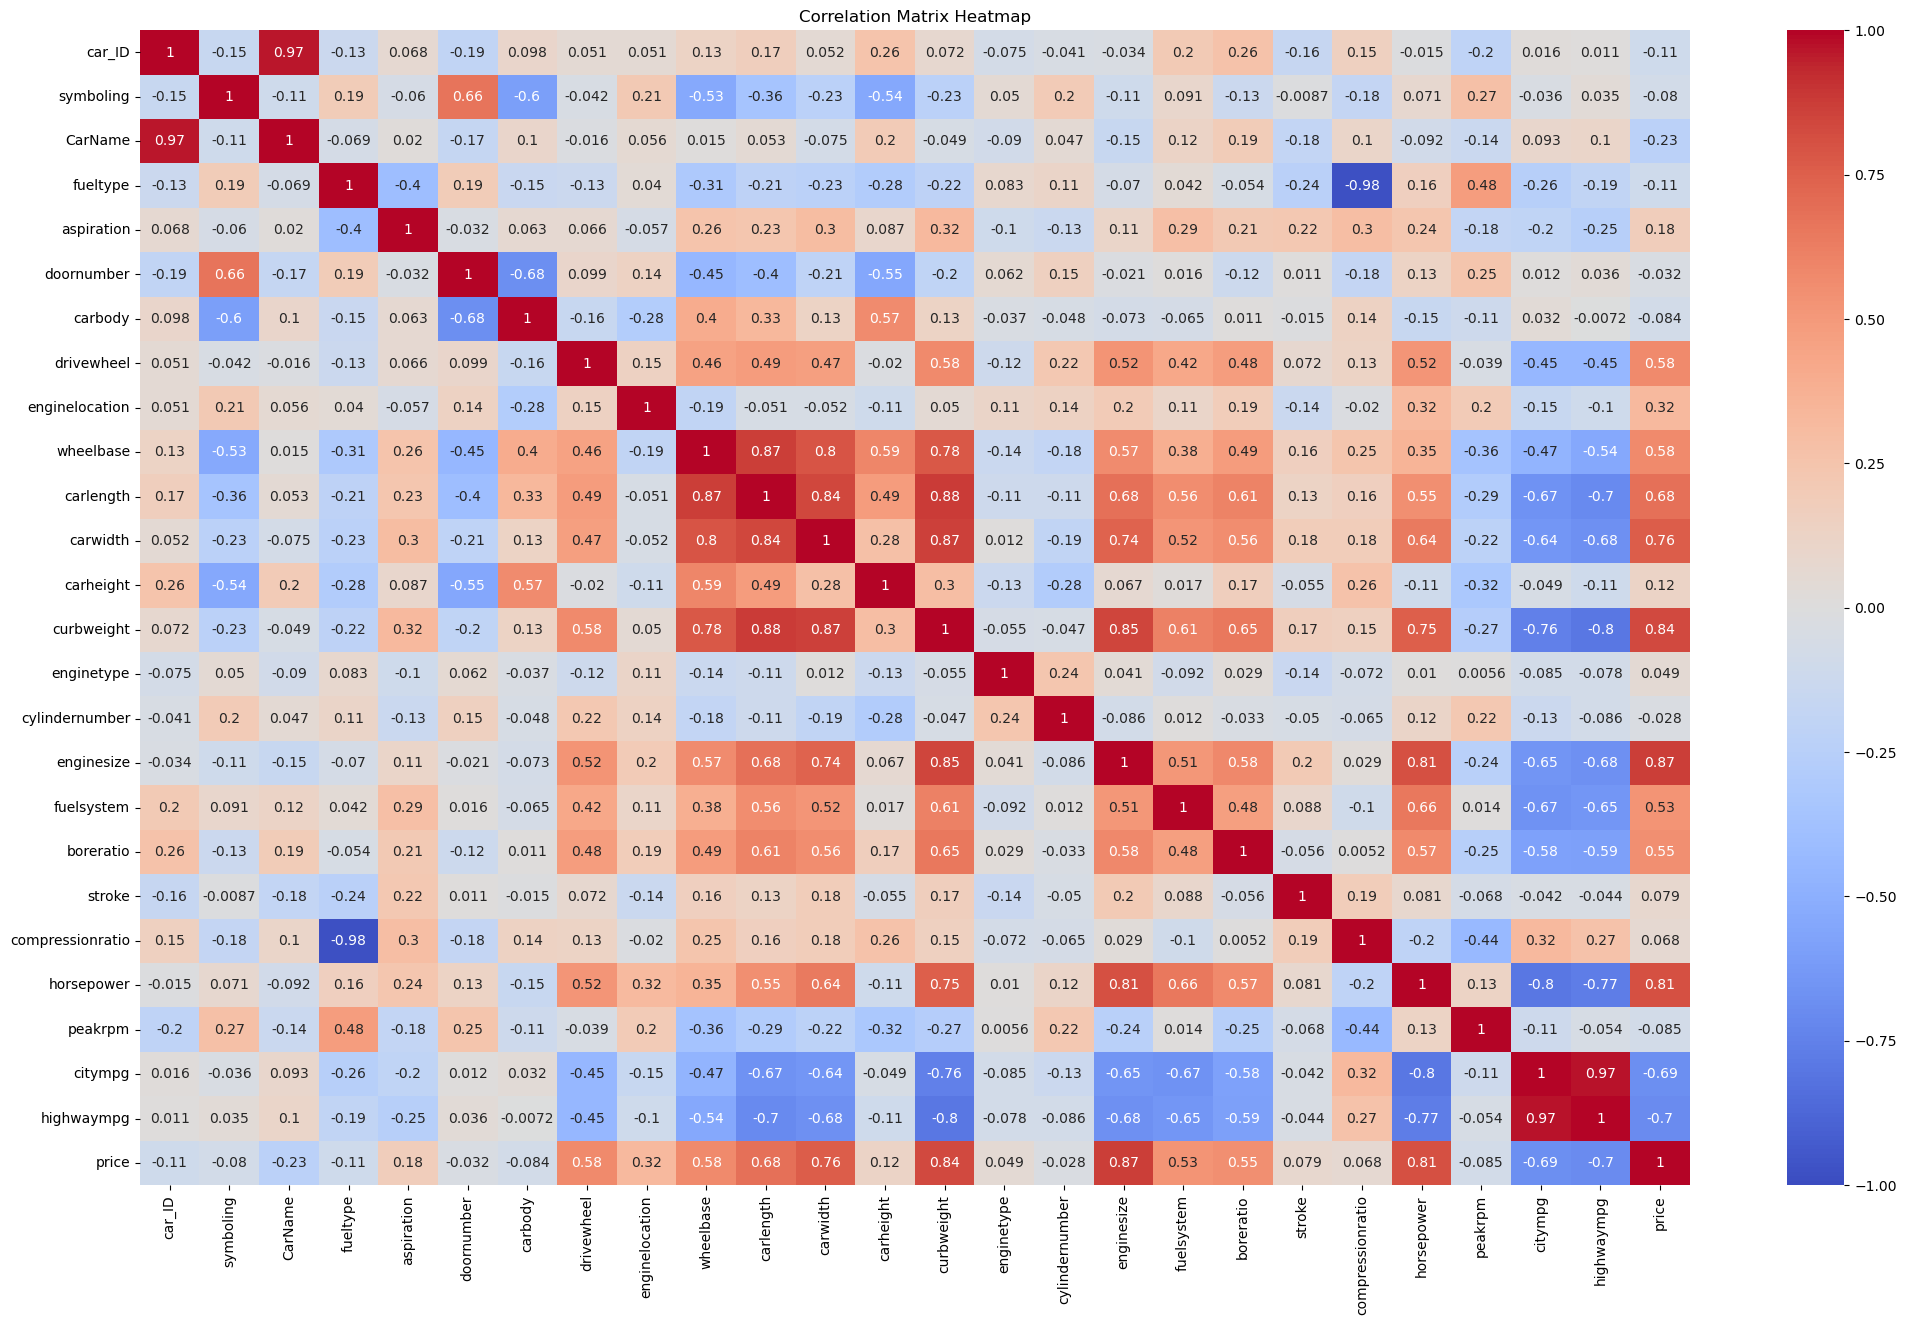

In [375]:
corr_matrix = df.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

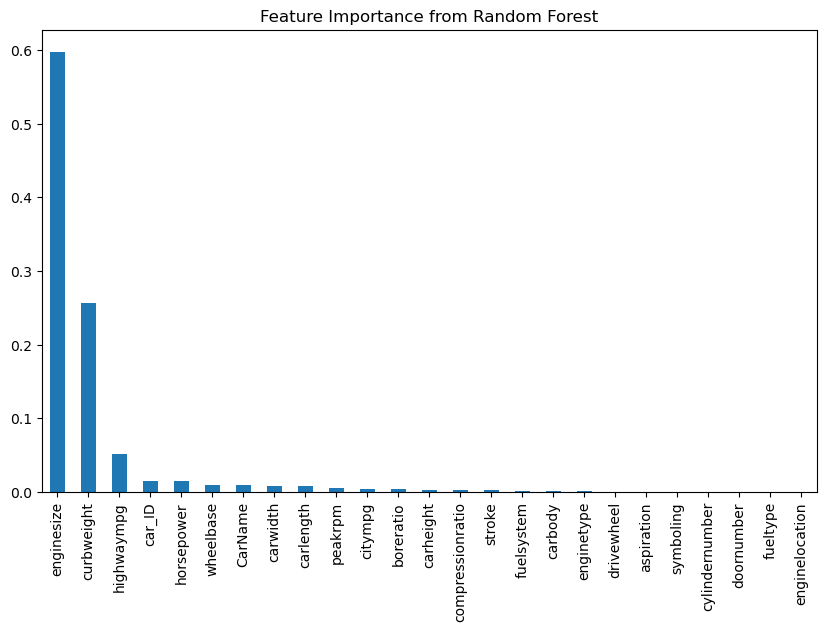

In [339]:
feature_importances = pd.Series(ran_for_reg.feature_importances_, index=x_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Feature Importance from Random Forest')
plt.show()

In [341]:
print(feature_importances.sort_values(ascending=False))


enginesize          0.597302
curbweight          0.256199
highwaympg          0.051142
car_ID              0.015093
horsepower          0.014784
wheelbase           0.009196
CarName             0.009184
carwidth            0.008025
carlength           0.007914
peakrpm             0.006075
citympg             0.004038
boreratio           0.003665
carheight           0.003536
compressionratio    0.003333
stroke              0.003073
fuelsystem          0.001695
carbody             0.001447
enginetype          0.001070
drivewheel          0.000872
aspiration          0.000852
symboling           0.000680
cylindernumber      0.000518
doornumber          0.000255
fueltype            0.000034
enginelocation      0.000018
dtype: float64


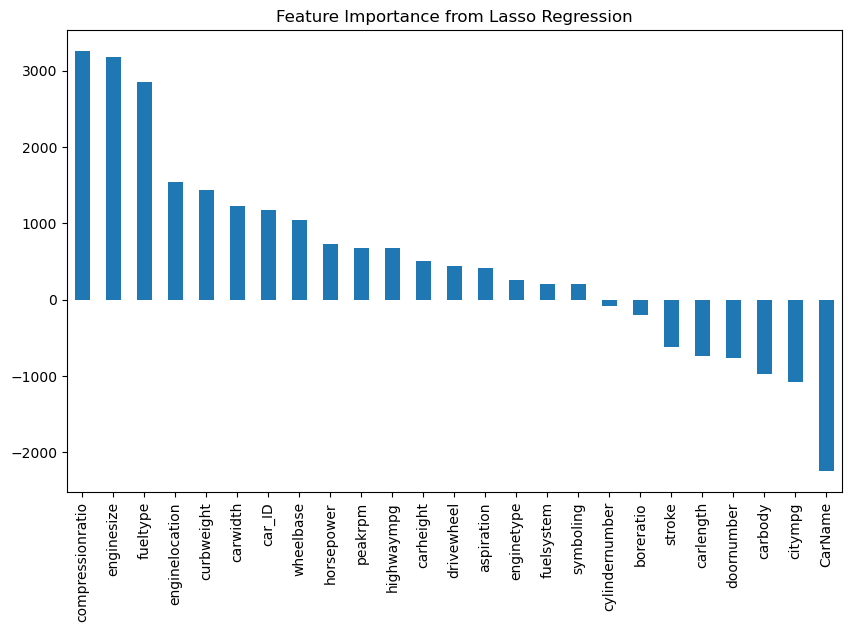

In [349]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lasso = Lasso(alpha=0.01) 

lasso.fit(x_train_scaled, y_train)
lasso_coef = pd.Series(lasso.coef_, index=x_train.columns)

lasso_coef.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Feature Importance from Lasso Regression')
plt.show()


In [351]:
print(lasso_coef.sort_values(ascending=False))

compressionratio    3253.463164
enginesize          3176.993366
fueltype            2845.569531
enginelocation      1542.802545
curbweight          1434.889667
carwidth            1229.561684
car_ID              1175.017868
wheelbase           1047.040273
horsepower           729.564937
peakrpm              676.031229
highwaympg           675.992508
carheight            507.312481
drivewheel           439.609613
aspiration           412.525331
enginetype           260.606759
fuelsystem           207.426869
symboling            206.777283
cylindernumber       -80.418642
boreratio           -198.675212
stroke              -618.557681
carlength           -741.189755
doornumber          -767.029623
carbody             -977.530123
citympg            -1075.705320
CarName            -2245.437031
dtype: float64


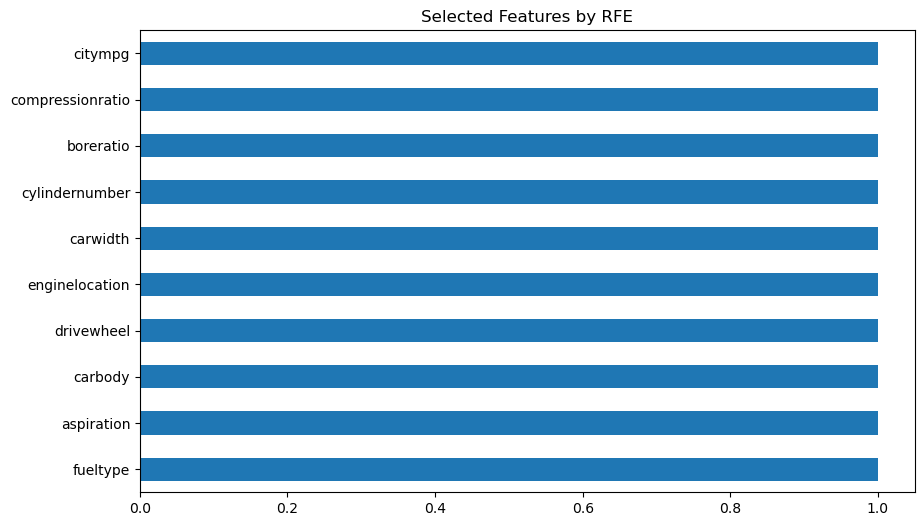

In [361]:
rfe = RFE(lin_reg, n_features_to_select=10)
rfe.fit(x_train, y_train)

ranking = pd.Series(rfe.ranking_, index=x_train.columns)

ranking[ranking == 1].plot(kind='barh', figsize=(10,6))
plt.title('Selected Features by RFE')
plt.show()

In [363]:
print(ranking[ranking == 1].index)

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'carwidth', 'cylindernumber', 'boreratio', 'compressionratio',
       'citympg'],
      dtype='object')


In [369]:
x_train_const = sm.add_constant(x_train)

ols_model = sm.OLS(y_train, x_train_const).fit()

In [367]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     56.06
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           5.03e-60
Time:                        02:17:47   Log-Likelihood:                -1503.0
No. Observations:                 164   AIC:                             3058.
Df Residuals:                     138   BIC:                             3139.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.296e+04   1.83e+04  

In [385]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=ran_for_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(x_train_imputed, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [387]:
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [392]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test_imputed)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [394]:
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.9523037215575819
Mean Squared Error: 3765336.00124022
Mean Absolute Error: 1329.724707317073


In [398]:
random_search = RandomizedSearchCV(estimator=ran_for_reg, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=2, scoring='r2')
random_search.fit(x_train_imputed, y_train)
print("Best Hyperparameters: ", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}


In [407]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
